In [11]:
import sys  
import os

# --- Diagnóstico ---  
print(f"Diretório de trabalho atual (onde o notebook está): {os.getcwd()}")  
  
# Pega o diretório de trabalho atual (a pasta 'notebooks/')  
notebook_dir = os.getcwd()  
  
# Sobe um nível para chegar à raiz do projeto ('estudos_cv/')  
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))  
  
print(f"Raiz do projeto calculada: {project_root}")  
print("-" * 20)  
print("Conteúdo encontrado na raiz do projeto:")  
try:  
    print(os.listdir(project_root))  
except FileNotFoundError:  
    print("ERRO: O caminho da raiz do projeto não foi encontrado!")  
print("-" * 20)  
  
# Adiciona a raiz do projeto ao caminho do Python se ainda não estiver lá  
if project_root not in sys.path:  
    sys.path.insert(0, project_root) # Usando insert(0,...) para dar prioridade  
  
print("Caminhos de busca do Python (sys.path):")  
print(sys.path)  
print("-" * 20)  
  
# --- Tentativa de Importação ---  
try:  
    from cv_lib import processamento  
    print("\nSUCESSO! Módulo 'cv_lib.processamento' importado corretamente.")  
except ModuleNotFoundError as e:  
    print(f"\nFALHA: Ainda não foi possível importar. Erro: {e}")

Diretório de trabalho atual (onde o notebook está): e:\Personal Projects\Mestrado\ESTUDO CV\Estudo em Python\estudos_cv\notebooks
Raiz do projeto calculada: e:\Personal Projects\Mestrado\ESTUDO CV\Estudo em Python\estudos_cv
--------------------
Conteúdo encontrado na raiz do projeto:
['.ipynb_checkpoints', '.vscode', 'assets', 'CLAUDE.md', 'cv_lib', 'cv_reference_mcp', 'notebooks', 'README.md']
--------------------
Caminhos de busca do Python (sys.path):
['e:\\Personal Projects\\Mestrado\\ESTUDO CV\\Estudo em Python\\estudos_cv', 'c:\\Users\\dronc\\anaconda3\\envs\\estudos_cv\\python39.zip', 'c:\\Users\\dronc\\anaconda3\\envs\\estudos_cv\\DLLs', 'c:\\Users\\dronc\\anaconda3\\envs\\estudos_cv\\lib', 'c:\\Users\\dronc\\anaconda3\\envs\\estudos_cv', '', 'c:\\Users\\dronc\\anaconda3\\envs\\estudos_cv\\lib\\site-packages', 'c:\\Users\\dronc\\anaconda3\\envs\\estudos_cv\\lib\\site-packages\\win32', 'c:\\Users\\dronc\\anaconda3\\envs\\estudos_cv\\lib\\site-packages\\win32\\lib', 'c:\\Users\\

# 1. Fundamentos de Processamento de Imagens

## 1.1 O que é uma Imagem Digital?

Uma imagem, para um computador, não é uma cena contínua, mas sim uma grade de números. O processo de converter uma cena do mundo real para essa grade digital envolve dois conceitos-chave: **Amostragem** e **Quantização**.

### Amostragem (Sampling)
É a discretização do **espaço**. Nós dividimos a imagem em uma grade, e cada célula dessa grade é um **pixel** (picture element). A densidade da grade define a **resolução** da imagem.

No nosso código `np.zeros((200, 300), ...)`:
- `(200, 300)` representa a **amostragem**. Estamos criando uma grade de 200 pixels de altura por 300 de largura.

### Quantização (Quantization)
É a discretização da **intensidade**. Para cada pixel, atribuímos um valor numérico que representa seu brilho ou cor. O padrão mais comum é usar 8 bits, o que nos dá **256 níveis** (de 0 a 255), onde 0 é preto e 255 é branco.

No nosso código `..., dtype=np.uint8)`:
- `dtype=np.uint8` (inteiro de 8 bits sem sinal) representa a **quantização**. Cada pixel pode ter um valor entre 0 e 255.

Raiz do projeto adicionada ao path: e:\Personal Projects\Mestrado\ESTUDO CV\Estudo em Python\estudos_cv
Ambiente configurado e biblioteca 'minha_cv_lib' importada com sucesso!


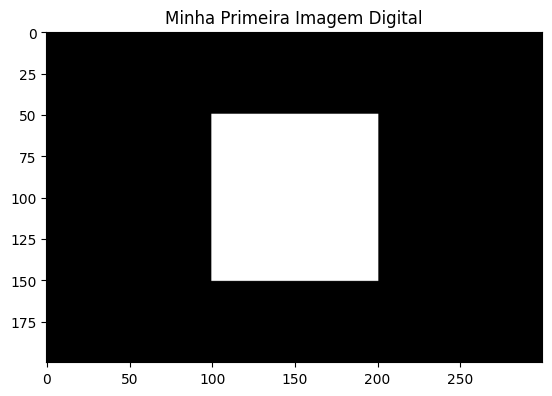

Dimensões da imagem (altura, largura): (200, 300)
Tipo de dados dos pixels: uint8
Valor mínimo de pixel: 0
Valor máximo de pixel: 255


In [12]:
import sys  
import os  
   
import numpy as np  
import matplotlib.pyplot as plt  
from skimage import data  
  
print(f"Raiz do projeto adicionada ao path: {project_root}")  
print("Ambiente configurado e biblioteca 'minha_cv_lib' importada com sucesso!")

# Vamos criar uma imagem simples do zero usando NumPy
# Uma imagem preta de 200x300 pixels
# O tipo de dado 'np.uint8' é importante (inteiro de 8 bits sem sinal, 0-255)
imagem_teste = np.zeros((200, 300), dtype=np.uint8)

# Vamos adicionar um retângulo branco no centro
# y de 50 a 150, x de 100 a 200
imagem_teste[50:151, 100:201] = 255

# Exibindo a imagem com Matplotlib
# 'cmap="gray"' informa que é uma imagem em escala de cinza
plt.imshow(imagem_teste, cmap="gray")
plt.title("Minha Primeira Imagem Digital")
plt.show()

# Imprimindo informações sobre nossa imagem
print(f"Dimensões da imagem (altura, largura): {imagem_teste.shape}")
print(f"Tipo de dados dos pixels: {imagem_teste.dtype}")
print(f"Valor mínimo de pixel: {imagem_teste.min()}")
print(f"Valor máximo de pixel: {imagem_teste.max()}")

## 1.2 Espaços de Cor: O Modelo RGB

Para representar cores, o modelo mais comum é o **RGB** (Red, Green, Blue). A ideia é que a maioria das cores pode ser formada pela combinação de diferentes intensidades de luz vermelha, verde e azul.

Em vez de um único valor por pixel (intensidade), uma imagem RGB tem **três valores** por pixel. Isso se reflete na estrutura do nosso array NumPy.

Ao carregar a imagem do gato, observamos:
- **`shape: (300, 451, 3)`**: Isso significa 300 pixels de altura, 451 de largura e **3 canais de cor**.
- **`dtype: uint8`**: Cada um desses valores nos 3 canais ainda é um número de 0 a 255.

Portanto, cada pixel é um vetor de 3 elementos, como `[R, G, B]`, onde cada elemento define a intensidade daquele canal de cor. A combinação desses três valores resulta na cor final que vemos na tela.

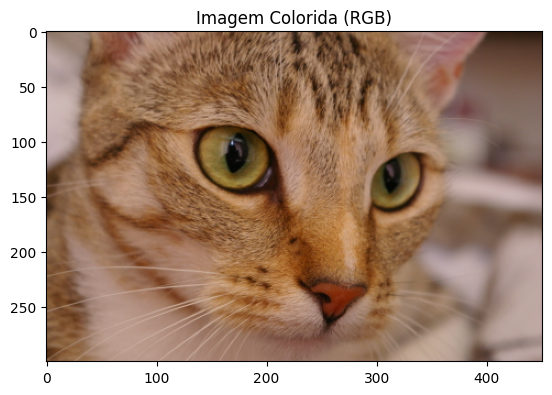

Tipo de dado da imagem: uint8
Dimensões da imagem (shape): (300, 451, 3)
Valor do pixel na posição (100, 50): [153 114  83]


In [13]:
from skimage import data
import matplotlib.pyplot as plt

# Carregando uma imagem de exemplo (um gato chamado Chelsea)
imagem_colorida = data.chelsea()

# Exibindo a imagem
plt.imshow(imagem_colorida)
plt.title("Imagem Colorida (RGB)")
plt.show()

# Imprimindo informações importantes
print(f"Tipo de dado da imagem: {imagem_colorida.dtype}")
print(f"Dimensões da imagem (shape): {imagem_colorida.shape}")

# Vamos inspecionar o valor de um único pixel (por exemplo, na posição y=100, x=50)
pixel_exemplo = imagem_colorida[100, 50]
print(f"Valor do pixel na posição (100, 50): {pixel_exemplo}")

### Conversão para Escala de Cinza

A conversão de RGB para escala de cinza é um passo fundamental em processamento de imagens. Em vez de uma média simples `(R+G+B)/3`, usamos uma média ponderada que leva em conta a sensibilidade do olho humano a diferentes cores. A fórmula padrão é:

`Cinza = 0.299 * R + 0.587 * G + 0.114 * B`

A função `processamento.rgb_para_cinza` que importamos da nossa biblioteca implementa exatamente essa lógica.

In [14]:
# Importando as bibliotecas padrão
from skimage import data
import matplotlib.pyplot as plt

# Importando a NOSSA biblioteca!
from cv_lib import processamento

# --- Carregando a imagem ---
imagem_colorida = data.chelsea()

# --- Testando nossa função importada ---
imagem_cinza_luminancia = processamento.rgb_para_cinza(imagem_colorida, tipo='luminancia')
imagem_cinza_media = processamento.rgb_para_cinza(imagem_colorida, tipo='media')

# --- Visualizando os resultados ---  
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  
  
axes[0].imshow(imagem_colorida)  
axes[0].set_title("Original RGB")  
axes[0].axis('off') # Desliga os eixos x e y  
  
axes[1].imshow(imagem_cinza_luminancia, cmap='gray')  
axes[1].set_title("Conversão para Cinza Luminância")  
axes[1].axis('off')  

axes[2].imshow(imagem_cinza_media, cmap='gray')
axes[2].set_title("Conversão para Cinza Média")
axes[2].axis('off')

plt.show()

# Verificando os shapes para confirmar
print(f"Shape da Imagem Original: {imagem_colorida.shape}")
print(f"Shape da Imagem em Cinza: {imagem_cinza_luminancia.shape}")
print(f"Shape da Imagem em Cinza: {imagem_cinza_media.shape}")

TypeError: rgb_para_cinza() got an unexpected keyword argument 'tipo'